In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
import gdown
from google.colab.patches import cv2_imshow
import torch

In [ ]:
gdown.download('https://drive.google.com/uc?export=download&id=1wVWDBlwAmtB-dBA7974_nH1XrolXqjf9', 'caucasian.jpg', quiet=False)
gdown.download('https://drive.google.com/uc?export=download&id=1yLjdbM_gpMvtvCi9mxLtDWIqoaZ1f0nq', 'messi.jpg', quiet=False)
gdown.download('https://drive.google.com/uc?export=download&id=1LXZ8kLjrekl0NDtWpqfjtVfrtTpfa7Sr', 'mask_messi.jpg', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1wVWDBlwAmtB-dBA7974_nH1XrolXqjf9
To: /content/caucasian.jpg
100%|██████████| 17.2k/17.2k [00:00<00:00, 12.1MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1yLjdbM_gpMvtvCi9mxLtDWIqoaZ1f0nq
To: /content/messi.jpg
100%|██████████| 67.8k/67.8k [00:00<00:00, 4.15MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LXZ8kLjrekl0NDtWpqfjtVfrtTpfa7Sr
To: /content/mask_messi.jpg
100%|██████████| 3.44k/3.44k [00:00<00:00, 1.66MB/s]


'mask_messi.jpg'

In [ ]:
fil_path = '/content'  # Base directory path for image files
imgcaucasian = 'caucasian.jpg'  # Filename of the bridge image
imgmessi = 'messi.jpg'  # Filename of the messi image
img_mask_messi = "mask_messi.jpg"

In [ ]:
messi_path = os.path.join(fil_path, imgmessi)
caucasian_path = os.path.join(fil_path, imgcaucasian)
img_mask_messi_path = os.path.join(fil_path, img_mask_messi)

#**Image Inpainting**

Image inpainting is the task of restoring missing or damaged regions of an image using information from the surrounding pixels. Image inpainting has many practical applications, such as restoring old photos, removing unwanted objects, filling in occlusions, and creating realistic image compositions. Machine Learning models can learn to perform image inpainting by training on large datasets of images and learning the patterns and structures of natural images. In this article, we will investigate one of the most popular, state-of-the-art image inpainting models, discuss its core building blocks, and walk through a hands-on example of real-life application in the e-commerce industry.

In [ ]:
def get_pixel_intensity(image_path, i, j):
    """
    Reads a grayscale image using OpenCV and retrieves the intensity
    at the specified pixel coordinates (i, j).

    Args:
        image_path (str): Path to the grayscale image.
        i (int): Row index of the pixel (y-coordinate).
        j (int): Column index of the pixel (x-coordinate).

    Returns:
        int: Pixel intensity (0-255) if the coordinates are valid.
        str: Error message if the coordinates are out of bounds.
    """
    # Read the image in grayscale mode
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    if image is None:
        return "Image could not be loaded. Please check the file path."

    # Check if (i, j) is within the image bounds
    if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
        return image[i, j]  # Return the pixel intensity
    else:
        return "Coordinates are out of bounds."



In [ ]:
def mark_point_on_image(image_path, i, j):
    """
    Marks a black dot at the specified (i, j) coordinate on the grayscale image.

    Args:
        image_path (str): Path to the image file.
        i (int): Row index of the point (y-coordinate).
        j (int): Column index of the point (x-coordinate).

    Returns:
        None: Displays the modified image with the marked point.
    """
    # Load the grayscale image
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Unable to load the image. Please check the file path.")
        return

    # Check if (i, j) is within the bounds of the image
    if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
        # Mark a black dot (pixel value = 0) at the given coordinate
        image[i, j] = 0
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.scatter([j], [i], c='red', s=10, label=f"Point ({i},{j})")  # Mark the point in red for visibility
        plt.legend()
        plt.title("Image with Marked Point")
        plt.show()
    else:
        print("Error: Coordinates are out of bounds.")

In [ ]:
def inpaint_image(image_path, mask_path, inpaint_radius=3, inpaint_method=cv.INPAINT_TELEA):
    """
    Applies inpainting to an image using a specified mask.

    Parameters:
        image_path (str): Path to the input image.
        mask_path (str): Path to the grayscale mask image.
        inpaint_radius (int): Radius of a circular neighborhood of each point inpainted.
        inpaint_method (int): Inpainting method, either cv.INPAINT_TELEA or cv.INPAINT_NS.

    Returns:
        dst (ndarray): The inpainted image.
    """
    img = cv.imread(image_path)
    # Load the mask image
    mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE) # Load mask as grayscale

    if img is None:
        raise ValueError(f"Cannot load image from path: {image_path}")

    # Use the loaded mask (NumPy array) in cv.inpaint
    dst = cv.inpaint(img, mask, inpaint_radius, inpaint_method)
    return dst

In [ ]:
def inpaint1_image(image_path, mask, inpaint_radius=3, inpaint_method=cv.INPAINT_TELEA):
    """
    Applies inpainting to an image using a specified mask.

    Parameters:
        image_path (str): Path to the input image.
        mask_path (str): Path to the grayscale mask image.
        inpaint_radius (int): Radius of a circular neighborhood of each point inpainted.
        inpaint_method (int): Inpainting method, either cv.INPAINT_TELEA or cv.INPAINT_NS.

    Returns:
        dst (ndarray): The inpainted image.
    """
    img = cv.imread(image_path)
    # Load the mask image


    if img is None:
        raise ValueError(f"Cannot load image from path: {image_path}")

    # Use the loaded mask (NumPy array) in cv.inpaint
    dst = cv.inpaint(img, mask, inpaint_radius, inpaint_method)
    return dst

In [ ]:
def threshold_image(image, I_lower, I_upper, region):
    """
    Apply a threshold to a specific region of an image.
    Pixels within the range [I_lower, I_upper] will be set to 255, otherwise set to 0.
    Pixels outside the specified region will remain unchanged.

    Args:
        image (numpy.ndarray): Input image as a 2D or 3D array.
        I_lower (float): Lower threshold value.
        I_upper (float): Upper threshold value.
        region (tuple, optional): Coordinates of the region (x_start, y_start, x_end, y_end).
                                  If None, apply to the entire image.

    Returns:
        numpy.ndarray: Image after applying the threshold.
    """
    # Copy the image to avoid modifying the original
    result_image = np.copy(image)

    if region:
        x_start, y_start, x_end, y_end = region
        # Apply the threshold only within the specified region
        result_image[y_start:y_end, x_start:x_end] = np.where(
            (I_lower <= image[y_start:y_end, x_start:x_end]) &
            (image[y_start:y_end, x_start:x_end] <= I_upper),
            255,
            0
        )
        result_image[np.r_[:y_start, y_end:result_image.shape[0]], :] = 0
        result_image[:, np.r_[:x_start, x_end:result_image.shape[1]]] = 0
    else:
        # Apply the threshold to the entire image
        result_image = np.where((I_lower <= image) & (image <= I_upper), 255, 0)

    return result_image


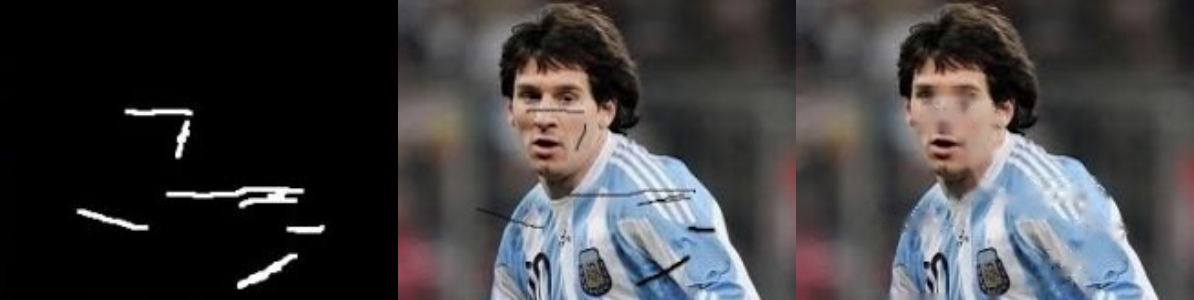

In [ ]:
mask_messi = cv.imread(img_mask_messi_path)
original_messi = cv.imread(messi_path)
inpaint_messi = inpaint_image(messi_path,img_mask_messi_path)

height = 300
mask_messi_resized = cv.resize(mask_messi, (int(mask_messi.shape[1] * height / mask_messi.shape[0]), height))
original_messi_resized = cv.resize(original_messi, (int(original_messi.shape[1] * height / original_messi.shape[0]), height))
inpaint_messi_resized = cv.resize(inpaint_messi, (int(inpaint_messi.shape[1] * height / inpaint_messi.shape[0]), height))


combined_image = np.hstack((mask_messi_resized, original_messi_resized, inpaint_messi_resized))


cv2_imshow(combined_image)

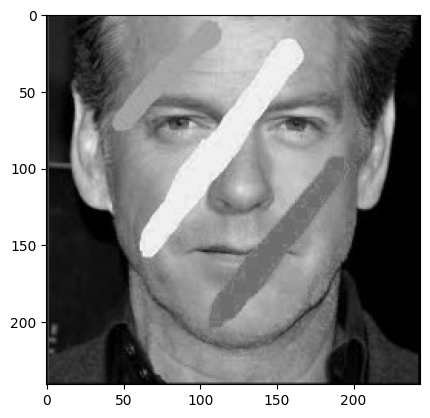

In [ ]:
# Load the grayscale image from 'imgKarlMax_path'
img = cv.imread(caucasian_path, cv.IMREAD_GRAYSCALE)

# Verify that the image has been loaded successfully; if not, raise an error message
assert img is not None, "File could not be read; check with os.path.exists()"
# Display the stacked image
plt.imshow(img, cmap="gray")  # Show 'res' as a grayscale image
plt.show()

45 - > 110

5 - > 69

In [ ]:
img.shape

(241, 244)

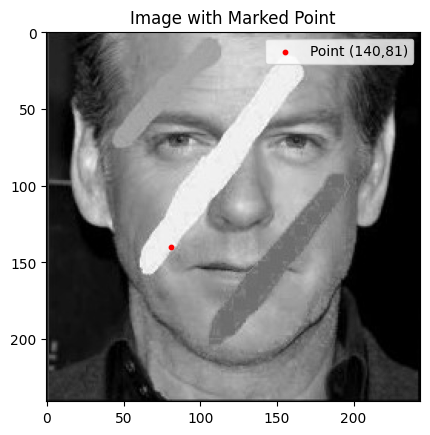

In [ ]:
mark_point_on_image(caucasian_path,140,81)

In [ ]:
I = get_pixel_intensity(caucasian_path,140,82)
print(I)

226


(241, 244)


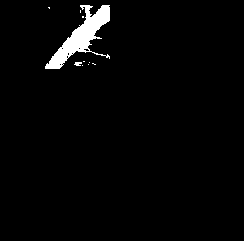

In [ ]:
mask_caucasian = threshold_image(img, 149, 164,(45,5,110,69))
print(mask_caucasian.shape)
mask_caucasian_show = cv2_imshow(mask_caucasian)


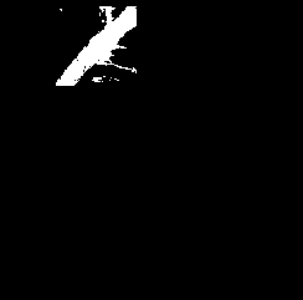

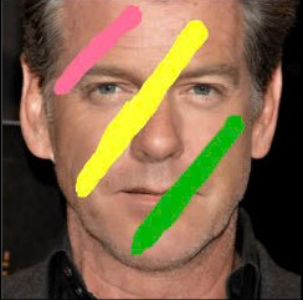

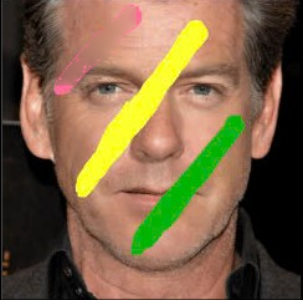

In [ ]:
inpaint_caucasian = inpaint1_image(caucasian_path, mask_caucasian,inpaint_radius=100, inpaint_method=cv.INPAINT_TELEA)
height = 300
original_caucasian = cv.imread(caucasian_path)
# Resize the images
mask_caucasian_resized = cv.resize(mask_caucasian, (int(mask_caucasian.shape[1] * height / mask_caucasian.shape[0]), height))
original_caucasian_resized = cv.resize(original_caucasian, (int(original_caucasian.shape[1] * height / original_caucasian.shape[0]), height))
inpaint_caucasian_resized = cv.resize(inpaint_caucasian, (int(inpaint_caucasian.shape[1] * height / inpaint_caucasian.shape[0]), height))



cv2_imshow(mask_caucasian_resized)
cv2_imshow(original_caucasian_resized)
cv2_imshow(inpaint_caucasian_resized)


#Converting RGB2HSV and HSV2RGB

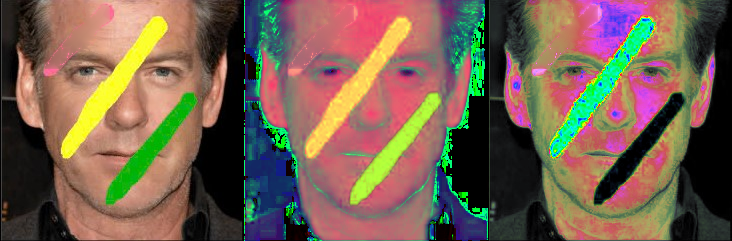

In [ ]:
# Convert RGB to HSV
hsv_image = cv.cvtColor(inpaint_caucasian, cv.COLOR_RGB2HSV)
# Convert HSV back to RGB
rgb_image = cv.cvtColor(inpaint_caucasian, cv.COLOR_HSV2RGB)

height, width = 300, 300

font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)
thickness = 2

combined_image = np.hstack((inpaint_caucasian,hsv_image, rgb_image))

cv2_imshow(combined_image)

#Calculation on Tensor

Although tensors appear to be complex objects, they can be understood as a collection of vectors and matrices. Understanding vectors and matrices is essential to understanding tensors.

A vector is a one-dimensional list of elements:

$x = [x_0,x_1,...,x_{n-1}]$

A matrix is a two-dimensional list of vectors:
$$
G_x =
\begin{bmatrix}
[ x_{0,0} & x_{0,1}& ... & x_{0,n-1} ] \\
[x_{1,0} & x_{1,0}& ...  & x_{1,n-1} ]\\
... & ... & ... \\
[x_{n-1,0} & x_{n-1,1}& ...  & x_{n-1,n-1}]
\end{bmatrix}$$

The subscript indicates the (row, column). Another way to think about a matrix is a vector with vectors as its elements. Note that they are commonly notated by capital letters.

A 3D tensor can be thought of as a three-dimensional list of matrices:


$$
\begin{bmatrix}
\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2} \\
x_{1,0} & x_{1,1} & x_{1,2} \\
x_{2,0} & x_{2,1} & x_{2,2}
\end{bmatrix} &
\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2} \\
x_{1,0} & x_{1,1} & x_{1,2} \\
x_{2,0} & x_{2,1} & x_{2,2}
\end{bmatrix} &
\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2} \\
x_{1,0} & x_{1,1} & x_{1,2} \\
x_{2,0} & x_{2,1} & x_{2,2}
\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
\begin{bmatrix}
\vec{x}_0 \\
\vec{x}_1 \\
\vec{x}_2
\end{bmatrix}&
\begin{bmatrix}
\vec{x}_0 \\
\vec{x}_1 \\
\vec{x}_2
\end{bmatrix}&
\begin{bmatrix}
\vec{x}_0 \\
\vec{x}_1 \\
\vec{x}_2
\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
X_0 &X_1&X_2 \\
\end{bmatrix}
= \mathcal{X}
$$


##Operations

In [ ]:
# Create a random number generator and set a fixed seed for reproducibility
gen = torch.Generator().manual_seed(2147483647)

##**Addition**

**Vector**

In [ ]:
x = torch.tensor([1, 3, 5])
y = torch.tensor([3, 7, 4])

x + y

tensor([ 4, 10,  9])

**Matrix**

In [ ]:
X = torch.tensor([[1, 3, 5],
                  [3, 6, 1],
                  [6, 8, 5],
                  [7, 3, 2]])

Y = torch.tensor([[6, 3, 2],
                  [8, 5, 4],
                  [3, 1, 7],
                  [1, 8, 3]])

X + Y

tensor([[ 7,  6,  7],
        [11, 11,  5],
        [ 9,  9, 12],
        [ 8, 11,  5]])

**Tensor-3D**

In [ ]:
# Generate a 3x3x2 tensor with random integers between 0 and 9 using the fixed generator
X = torch.randint(0, 10, (3, 3, 2), generator=gen)

# Generate another 3x3x2 tensor with random integers between 0 and 9 using the same generator
Y = torch.randint(0, 10, (3, 3, 2), generator=gen)
print("X = ",X)
print("\n")
print('Y = ',Y)
print("\n")
X+Y

X =  tensor([[[1, 4],
         [9, 2],
         [3, 0]],

        [[4, 6],
         [7, 7],
         [1, 5]],

        [[6, 8],
         [1, 4],
         [4, 9]]])


Y =  tensor([[[8, 0],
         [3, 6],
         [6, 0]],

        [[9, 1],
         [0, 0],
         [2, 2]],

        [[7, 1],
         [8, 1],
         [9, 0]]])




tensor([[[ 9,  4],
         [12,  8],
         [ 9,  0]],

        [[13,  7],
         [ 7,  7],
         [ 3,  7]],

        [[13,  9],
         [ 9,  5],
         [13,  9]]])

##**Subtraction**

**Vector**

In [ ]:
x = torch.tensor([1, 3, 5])
y = torch.tensor([3, 7, 4])

x - y

tensor([-2, -4,  1])

**Matrix**

In [ ]:
X = torch.tensor([[1, 3, 5],
                  [3, 6, 1],
                  [6, 8, 5],
                  [7, 3, 2]])

Y = torch.tensor([[6, 3, 2],
                  [8, 5, 4],
                  [3, 1, 7],
                  [1, 8, 3]])

X - Y

tensor([[-5,  0,  3],
        [-5,  1, -3],
        [ 3,  7, -2],
        [ 6, -5, -1]])

**Tensor-3D**

In [ ]:
# Generate a 3x3x2 tensor with random integers between 0 and 9 using the fixed generator
X = torch.randint(0, 10, (3, 3, 2), generator=gen)

# Generate another 3x3x2 tensor with random integers between 0 and 9 using the same generator
Y = torch.randint(0, 10, (3, 3, 2), generator=gen)
print("X = ",X)
print("\n")
print('Y = ',Y)
print("\n")
X-Y

X =  tensor([[[6, 3],
         [6, 4],
         [5, 7]],

        [[3, 7],
         [2, 0],
         [5, 1]],

        [[0, 4],
         [0, 8],
         [0, 6]]])


Y =  tensor([[[0, 5],
         [8, 6],
         [1, 0]],

        [[5, 1],
         [1, 6],
         [1, 2]],

        [[6, 0],
         [2, 6],
         [1, 5]]])




tensor([[[ 6, -2],
         [-2, -2],
         [ 4,  7]],

        [[-2,  6],
         [ 1, -6],
         [ 4, -1]],

        [[-6,  4],
         [-2,  2],
         [-1,  1]]])

##**Dot Product (Multiplication)**

**Vector**

In [ ]:
x = torch.tensor([1, 3, 5])
y = torch.tensor([3, 7, 4])

torch.dot(x, y) # 1*3 + 3*7 + 5*4 = 3 + 21 + 20 = 44

tensor(44)

This could also be performed with x @ y. The output of the dot product is a scalar. It does not return a vector.

**Matrix**

In [ ]:
X = torch.tensor([[1, 3, 5],
                  [3, 6, 1],
                  [6, 8, 5],
                  [7, 3, 2]])

Y = torch.tensor([[6, 3, 2],
                  [8, 5, 4],
                  [3, 1, 7],
                  [1, 8, 3]])

X.matmul(Y.T) # X @ Y.T

tensor([[ 25,  43,  41,  40],
        [ 38,  58,  22,  54],
        [ 70, 108,  61,  85],
        [ 55,  79,  38,  37]])

**Tensor-3D**

In [ ]:
# Generate a 3x3x2 tensor with random integers between 0 and 9 using the fixed generator
X = torch.randint(0, 10, (3, 3, 2), generator=gen)

# Generate another 3x3x2 tensor with random integers between 0 and 9 using the same generator
Y = torch.randint(0, 10, (3, 3, 2), generator=gen)
print("X = ",X)
print("\n")
print('Y = ',Y)
print("\n")
print(Y.transpose(1,2))
print("\n")
print(Y.transpose(1,2).shape) # Y.permute(0, 2, 1)
print("\n")
X.matmul(Y.transpose(1,2)) # X @ Y.transpose(1,2)

X =  tensor([[[3, 1],
         [4, 5],
         [2, 3]],

        [[4, 6],
         [0, 4],
         [7, 5]],

        [[5, 4],
         [7, 7],
         [1, 6]]])


Y =  tensor([[[6, 6],
         [8, 0],
         [2, 5]],

        [[3, 4],
         [9, 1],
         [1, 2]],

        [[9, 3],
         [7, 2],
         [3, 3]]])


tensor([[[6, 8, 2],
         [6, 0, 5]],

        [[3, 9, 1],
         [4, 1, 2]],

        [[9, 7, 3],
         [3, 2, 3]]])


torch.Size([3, 2, 3])




tensor([[[24, 24, 11],
         [54, 32, 33],
         [30, 16, 19]],

        [[36, 42, 16],
         [16,  4,  8],
         [41, 68, 17]],

        [[57, 43, 27],
         [84, 63, 42],
         [27, 19, 21]]])

##**Hadamard Product (Multiplication)**

The Hadamard product is used to perform element-wise multiplication and returns a vector.

**Vector**

In [ ]:
x = torch.tensor([1, 3, 5])
y = torch.tensor([3, 7, 4])

x * y

tensor([ 3, 21, 20])

**Matrix**

In [ ]:
X = torch.tensor([[1, 3, 5],
                  [3, 6, 1],
                  [6, 8, 5],
                  [7, 3, 2]])

Y = torch.tensor([[6, 3, 2],
                  [8, 5, 4],
                  [3, 1, 7],
                  [1, 8, 3]])

X * Y

tensor([[ 6,  9, 10],
        [24, 30,  4],
        [18,  8, 35],
        [ 7, 24,  6]])

**Tensor-3D**

In [ ]:
# Generate a 3x3x2 tensor with random integers between 0 and 9 using the fixed generator
X = torch.randint(0, 10, (3, 3, 2), generator=gen)

# Generate another 3x3x2 tensor with random integers between 0 and 9 using the same generator
Y = torch.randint(0, 10, (3, 3, 2), generator=gen)
print("X = ",X)
print("\n")
print('Y = ',Y)
print("\n")
X * Y

X =  tensor([[[1, 2],
         [8, 1],
         [7, 7]],

        [[7, 0],
         [5, 0],
         [4, 3]],

        [[2, 6],
         [9, 5],
         [0, 1]]])


Y =  tensor([[[5, 3],
         [4, 5],
         [9, 6]],

        [[4, 3],
         [1, 8],
         [5, 0]],

        [[7, 5],
         [3, 0],
         [2, 7]]])




tensor([[[ 5,  6],
         [32,  5],
         [63, 42]],

        [[28,  0],
         [ 5,  0],
         [20,  0]],

        [[14, 30],
         [27,  0],
         [ 0,  7]]])

##**Scalar Multiplication**

k is a scalar, which is a real number in most instances.

**Vector**

In [ ]:
k = 5
x = torch.tensor([1, 3, 5])

k * x

tensor([ 5, 15, 25])

**Matrix**

In [ ]:
k = 5
X = torch.tensor([[1, 3, 5],
                  [3, 6, 1],
                  [6, 8, 5],
                  [7, 3, 2]])

k * X

tensor([[ 5, 15, 25],
        [15, 30,  5],
        [30, 40, 25],
        [35, 15, 10]])

**Tensor-3D**

In [ ]:
# Generate a 3x3x2 tensor with random integers between 0 and 9 using the fixed generator
X = torch.randint(0, 10, (3, 3, 2), generator=gen)
k = 5
print("X = ",X)
print("\n")
k*X

X =  tensor([[[4, 9],
         [7, 9],
         [6, 6]],

        [[1, 1],
         [5, 7],
         [1, 7]],

        [[0, 0],
         [1, 0],
         [4, 5]]])




tensor([[[20, 45],
         [35, 45],
         [30, 30]],

        [[ 5,  5],
         [25, 35],
         [ 5, 35]],

        [[ 0,  0],
         [ 5,  0],
         [20, 25]]])



### Homework

#### Theoretical Exercises:
1. **State the applications of image inpainting.**  
2. **State the applications of image inpainting in AI.**  
3. **Compare the advantages and disadvantages of image inpainting, image denoising, and image filtering.**  
4. **State the applications of RGB and HSV color channels.**  
5. **Provide the mathematical definition of a tensor.**  

#### Practical Exercises:
1. Choose any image from the internet to restore and ensure a mask is available. **Run the image and the mask with the `inpaint_image` function.**  
2. Reuse the Caucasian image provided for the problem. **Determine the coordinates of the two regions that require a mask on the image (`x_start`, `x_end`, `y_start`, `y_end`).**  
3. **Estimate the frequency range** of the two regions identified in step 2 to restore the image.  
4. **Create a mask** based on the regions and frequency ranges identified in steps 2 and 3.  
5. Run the image again using the masks created in step 4.  
6. **Choose two vectors, two matrices, and two 3D tensors with larger sizes.** Perform all calculations as instructed in the sample essay.  

